# Objectives

- What is Regex ? Pattern Recognition ? What are some use cases ?
- Introduction to the re python package (building search patterns, re.findall(), re.sub(), re.split(), re.search())
- Example 1: applying Regex on text to extract email addresses 
- Example 2: applying Regex on html text (e.g. link extraction)

# Warm-up

### 1. What is *Regular Expressions* ? Name 3 use cases ?

### 2. Find the common pattern in the images

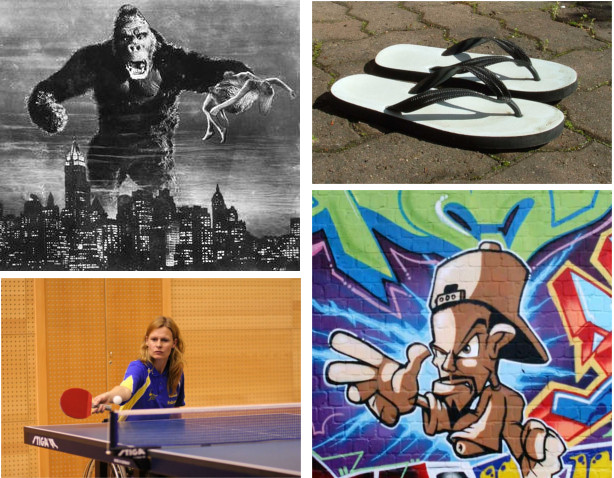

### A:

### 1. What is *Regular Expressions* ? Name 3 use cases ?

- a regular expression (e.g. regex) is a sequence of characters that specifies a search pattern
- usually these patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation
- it is a technique developed in theoretical computer science and formal language theory
- the concept of regular expressions was introduced in the 1950s by mathematician Stephen Cole Kleene, who formalized the description of a regular language

**Regex has many use cases, including but not limited to:**

- passwords pattern recognition
- form checking
- file search on hardrives
- email format checker
- web-scraping
- text preprocessing (e.g. text stripping, smart character replacement, ...etc.)



#### Email detection 
[A-Za-z0-9\._+]+@[A-Za-z]+\.(com|org|edu|net)

    at least one letter, number, underscore, plus or dot
    at-symbol
    at least one upper or lower case symbol
    a period
    must end with com, org, edu or net



## 1. re python package

In [1]:
import re

### 1.1 Building search patterns

In [2]:
text_1 = "king-kong    is playing ping-pong wearing flip-flops and listening to hip-hop and random-roses are here"


| character | meaning |
|-----------|---------|
| `.` | any character |
| `+` | matches the previous token between one and unlimited times, as many times as possible |
| `[a-z]` | matches any lowercase letter |
| `[0-9]` | matches any number |
| `^`| "not" operator, e.g. `[^a-z]+` |
| `\w` | matches any alphanumeric character |
| `\W` | Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_] |
| `\d` | matches any decimal digit; this is equivalent to the class [0-9] |
| `\D` | Matches any non-digit character; this is equivalent to the class [^0-9] |
| `\|` | logical OR; used to add multiple search patterns together |
| `\` | escape special characters |
| `(x)` | match group; extract out whatever you put in parenthesis |
| `{x,y}` | matches the previous token between x and y number of times |
| `\s` | matches any whitespace character |
| `\S` | matches any non-whitespace character |
| `*` | specifies that the previous character can be matched zero or more times, instead of exactly once |
| `{n}` | specifies that the previous character can be matched exactly n times |
| `{m, n}` | specifies that the previous character can be matched between m and n times |
| `?` | specifies that the pattern search should be non-greedy|

In [3]:
pattern = '(\w+i\w+-\w+o\w+)'

In [5]:
#pattern = r'(\w+i\w+\-\w+o\w+)'

### 1.2  re.match( ) vs. re.search( )

**re package offers two different primitive operations based on regular expressions:** 

1. *re.match(pattern, string)* checks for a match only at the beginning of the string
2. *re.search(pattern, string)* checks for a match anywhere in the string, but the search stops once a match is found

In [10]:
result = re.match(pattern, text_1)

print(result)

<re.Match object; span=(0, 9), match='king-kong'>


In [11]:
re.search(pattern, text_1)

<re.Match object; span=(0, 9), match='king-kong'>

### 1.3 re.findall( )


*re.findall(pattern, string)* matches all occurrences of a pattern, not just the first one as *re.search(pattern, string)* does

In [12]:
re.findall(pattern, text_1)

['king-kong', 'ping-pong', 'flip-flops', 'hip-hop']

### 1.4 re.sub( )

*re.sub(pattern, repl, string, count=0)* returns the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl; If the pattern isn’t found, string is returned unchanged. 

The **count** attribute controls how many replacements to make if multiple matches exist

In [16]:
re.sub(pattern, 'substitute', text_1, count=1)

'substitute    is playing ping-pong wearing flip-flops and listening to hip-hop and random-roses are here'

### 1.5 re.split( )

*re.split(pattern, string, maxsplit=0)* splits string by the occurrences of pattern; If maxsplit is nonzero, at most maxsplit splits occur, and the remainder of the string is returned as the final element of the list

In [18]:
re.split(pattern, text_1, maxsplit=0)

['',
 'king-kong',
 '    is playing ',
 'ping-pong',
 ' wearing ',
 'flip-flops',
 ' and listening to ',
 'hip-hop',
 ' and random-roses are here']

### 2. Example 1: Extract email addresses

In [9]:
# multi-line python raw string

emails = r"""
random_roses@spiced-academy.com
randomroses@spiced-academy.com
random.roses@spiced-academy.org
Rroses@spicedacademy.net
random-roses@spiced_academy.edu
randomroses@spiced-academy.it
"""

### A:

In [10]:
# assuming that an email can have the most basic format

email_pattern = r'[\S]+@[\S]+\.[\S]{2,3}'

In [11]:
re.findall(email_pattern, emails)

['random_forest_fennels@spiced-academy.com',
 'randomforestfennels@spiced-academy.com',
 'randomforest.fennels@spiced-academy.org',
 'RFFennels@spicedacademy.net',
 'random-forest-fennels@spiced_academy.edu',
 'randomforest-fennels@spiced-academy.it']

### 3. Example 2: Extracting hyperlinks in html

In [36]:
import requests

In [37]:
url = 'https://genius.com/artists/Dua-lipa' 
html = requests.get( url ).content

In [38]:
html

b'\n\n<!DOCTYPE html>\n<html class="snarly bagon_song_page--enabled song_stories_public_launch--enabled react_forums--disabled report_abuse--disabled react_song_metadata--disabled react_lyrics_proposal--disabled" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" lang="en" xml:lang="en">\n  <head>\n    <base target=\'_top\' href="//genius.com/">\n\n    <script type="text/javascript">\n//<![CDATA[\n\n  var _sf_startpt=(new Date()).getTime();\n  if (window.performance && performance.mark) {\n    window.performance.mark(\'parse_start\');\n  }\n\n//]]>\n</script>\n\n<title>Dua Lipa Lyrics, Songs, and Albums | Genius</title>\n\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta content=\'width=device-width,initial-scale=1\' name=\'viewport\'>\n\n  <meta name="apple-itunes-app" content="app-id=709482991">\n\n<link href="https://assets.genius.com/images/apple-touch-icon.png?1634589761" rel="apple-touch-icon" />\n\n\n  \n\n  <link href="

In [15]:
# example of a short html text similar to the scrapped html

text_2 = '''
some text some text <a class="wrong-class-name" href="coriander">  some other text ? <a href="rosemary"> 
some more text, even more text
<a class="correct-class-name" href="roses">
'''


In [40]:
# let's start by capturing everything inside <...> first

element_pattern_greedy = '<a.+>'

re.findall(element_pattern_greedy, text_2)

['<a class="wrong-class-name" href="coriander">  some other text ? <a href="rosemary">',
 '<a class="correct-class-name" href="fennels">']

In [41]:
# we want to turn our search engine to non-greedy

element_pattern_nongreedy = r'<a.+?>'

re.findall(element_pattern_nongreedy, text_2)

['<a class="wrong-class-name" href="coriander">',
 '<a href="rosemary">',
 '<a class="correct-class-name" href="fennels">']

In [42]:
# let's target the correct class and extract the link only from the pattern

links_pattern = '<a\sclass=\"correct-class-name\"\shref=\"(.+)\">'

In [43]:
re.findall(links_pattern, text_2)


['fennels']